Deep Learning using Rectified Linear Units (ReLU)
===

*This notebook is a part of an on-going research of the same title.*

## Wisconsin Diagnostic Breast Cancer (WDBC) classification

In which we use the WDBC dataset for evaluating our DNN-ReLU model. We first employ data preprocessing techniques such as normalization through standardization, and dimensionality reduction through principal component analysis (PCA).

We load the WDBC dataset.

In [1]:
from keras.utils import to_categorical
from sklearn.datasets import load_breast_cancer

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
features = load_breast_cancer().data
labels = load_breast_cancer().target

# one-hot encode the labels
labels = to_categorical(labels)

We load `numpy` for handling data, and `matplotlib` and `seaborn` for data visualization.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

We split the dataset into training and testing data.

In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.30, stratify=labels)

We normalize the training dataset using `StandardScaler`.

In [5]:
from sklearn.preprocessing import StandardScaler

We fit the normalization function to the training dataset, so as to not get any information from the testing dataset.

In [6]:
scaler = StandardScaler().fit(train_features)

After fitting the normalization function to the training dataset alone, we transform both training and testing dataset.

In [7]:
normalized_train = scaler.transform(train_features)
normalized_test = scaler.transform(test_features)

We list the class names for reports later.

In [8]:
class_names = ['Malignant', 'Benign']

## 3-layer DNN + ReLU + Adam + Categorical Cross-entropy

We load a feed-forward neural network with ReLU activation function in its hidden layers, and ReLU as its classifier.

In [9]:
from models.dnn_keras import DNN

We use softmax cross-entropy for loss function, and Adam as optimization algorithm.

In [10]:
model = DNN(activation='relu',
            classifier='relu',
            dropout_rate=0.1,
            loss='categorical_crossentropy',
            optimizer='adam',
            num_classes=train_labels.shape[1],
            num_features=train_features.shape[1],
            num_neurons=[128, 64, 32],
            return_summary=True)

<log> Building graph...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)              

Train on batch size of $256$, with 10-fold cross validation, with each fold running 32 epochs.

In [11]:
model.train(batch_size=256,
            n_splits=10,
            epochs=32,
            validation_split=0.,
            verbose=0,
            train_features=train_features,
            train_labels=train_labels)

loss : 0.6166618824005127, acc : 0.625
loss : 0.3112059235572815, acc : 0.85
loss : 0.1720331698656082, acc : 0.95
loss : 0.23822111487388611, acc : 0.925
loss : 0.22271109223365784, acc : 0.95
loss : 0.41848061680793763, acc : 0.85
loss : 0.35333064794540403, acc : 0.825
loss : 0.13550923466682435, acc : 1.0
loss : 0.14690193304648766, acc : 0.9230769246052473
loss : 0.29689344610923374, acc : 0.8974358989642217
CV acc : 0.8795512823569469, CV stddev : +/- 0.09911236982884873


Evaluate the trained DNN-ReLU model.

In [12]:
report, confusion_matrix = model.evaluate(batch_size=256,
                                          test_features=test_features,
                                          test_labels=test_labels,
                                          class_names=class_names)

171/171 [==============================] - 0s 124us/step
Test loss : 0.30504661467340255
Test accuracy : 0.9064327502808376


Print the classification report which consists of the precision, recall, and f1-score for each class.

In [13]:
print(report)

             precision    recall  f1-score   support

  Malignant       0.98      0.77      0.86        64
     Benign       0.88      0.99      0.93       107

avg / total       0.91      0.91      0.90       171



Print the confusion matrix for the predicted labels on the Fashion-MNIST test dataset.

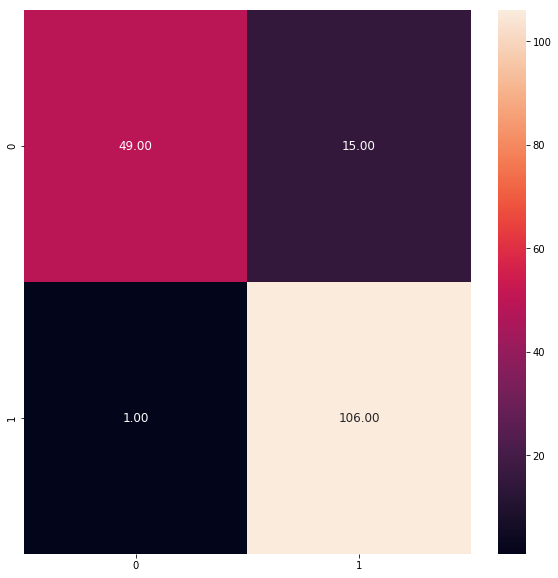

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 12}, fmt='.2f')

## 3-layer DNN + Softmax + Adam + Categorical Cross-entropy

We load a feed-forward neural network with ReLU activation function in its hidden layers.

In [15]:
from models.dnn_keras import DNN

We use softmax cross-entropy for loss function, and Adam as optimization algorithm, and the conventional softmax classifier.

In [16]:
model = DNN(activation='relu',
            classifier='softmax',
            dropout_rate=0.1,
            loss='categorical_crossentropy',
            optimizer='adam',
            num_classes=train_labels.shape[1],
            num_features=train_features.shape[1],
            num_neurons=[128, 64, 32],
            return_summary=True)

<log> Building graph...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)              

Train on batch size of $256$, with 10-fold cross validation, with each fold running 32 epochs.

In [17]:
model.train(batch_size=256,
            n_splits=10,
            epochs=32,
            validation_split=0.,
            verbose=0,
            train_features=train_features,
            train_labels=train_labels)

loss : 1.7302509784698485, acc : 0.875
loss : 1.039413857460025, acc : 0.9
loss : 0.40295250415802286, acc : 0.975
loss : 1.7225996017456056, acc : 0.875
loss : 1.986456799809821, acc : 0.875
loss : 0.7291283845901517, acc : 0.925
loss : 0.3670554876327515, acc : 0.875
loss : 0.12326986789703369, acc : 1.0
loss : 0.18150603618377295, acc : 0.9230769246052473
loss : 0.2529954428856189, acc : 0.8974358989642217
CV acc : 0.9120512823569469, CV stddev : +/- 0.04223361812453362


Evaluate the trained DNN-ReLU model.

In [18]:
report, confusion_matrix = model.evaluate(batch_size=256,
                                          test_features=test_features,
                                          test_labels=test_labels,
                                          class_names=class_names)

171/171 [==============================] - 0s 91us/step
Test loss : 0.23953434336952298
Test accuracy : 0.9239766081871345


Print the classification report which consists of the precision, recall, and f1-score for each class.

In [19]:
print(report)

             precision    recall  f1-score   support

  Malignant       0.93      0.86      0.89        64
     Benign       0.92      0.96      0.94       107

avg / total       0.92      0.92      0.92       171



Print the confusion matrix for the predicted labels on the Fashion-MNIST test dataset.

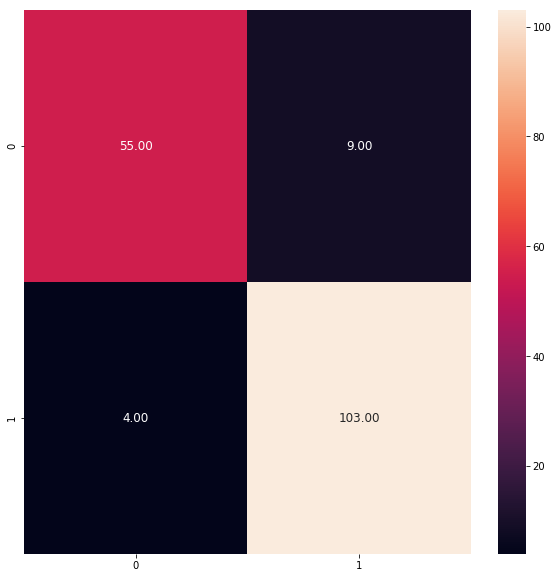

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 12}, fmt='.2f')